[5.7422e-01 8.2990e-02 3.0720e+03 3.0720e+03 6.1440e+03 6.1440e+04
 1.6000e+01]
[5.566e-02 8.150e-02 3.072e+03 3.072e+03 6.144e+03 6.144e+04 1.600e+01]
[3.174e-02 7.126e-02 3.072e+03 3.072e+03 6.144e+03 6.144e+04 1.600e+01]
[1.660e-02 6.583e-02 3.072e+03 3.072e+03 6.144e+03 6.144e+04 1.600e+01]
[0 1 2 3 4 5 6]
[array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [0.09693149, 0.98204603, 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [0.05527498, 0.85865767, 1.        , 1.        , 1.        ,
        1.        , 1.        ],
       [0.02890878, 0.7932281 , 1.        , 1.        , 1.        ,
        1.        , 1.        ]])]


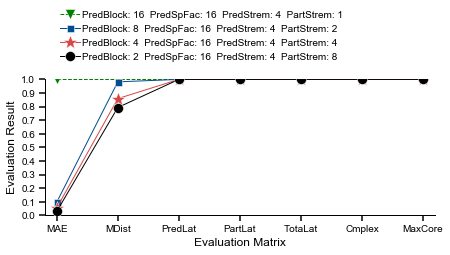

In [48]:
# FPS_Performance_Eval

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../Nebula/scripts/')
sys.path.append('../source/')
from cls_plt_fig import cls_plt_fig

# np.save(file="perf.npy", arr=np.ones([2, 2, 2, 2, 7]))

fig_name ='../generate/FPS_Performance_Eval.svg'
perf = np.load(file='../source/eval.npy')

# pick    = [[16, 8, 1, 8], [16, 8, 4, 8], [16, 8, 5, 8], [16, 8, 6, 8], [16, 8, 8, 8], [16, 8, 12, 8], [16, 8, 16, 8]] # -> PredStrem = 4

# pick    = [[16, 8, 4, 1], [16, 8, 4, 4], [16, 8, 4, 8], [16, 8, 4, 12], [16, 8, 4, 16]]
# pick    = [[32, 16, 4, 1], [16, 16, 4, 2], [8, 16, 4, 4], [4, 16, 4, 8], [2, 16, 4, 16]]  # -> Block*Part = 32
pick    = [[16, 16, 4, 1], [8, 16, 4, 2], [4, 16, 4, 4], [2, 16, 4, 8]]  # -> Block unimportant becuase of PartStem, recommand 8; Complexible Block size and thus Compatible to FM extraction

# pick    = [[16, 2, 4, 2], [16, 4, 4, 2], [16, 8, 4, 2], [16, 12, 4, 2], [16, 16, 4, 2], [16, 32, 4, 2]]
# pick    = [[16, 8, 4, 2], [16, 12, 4, 2], [16, 16, 4, 2], [16, 32, 4, 2]] # -> SpFactor = 16
legend  = []
y_value = []
item_dim    = []
scale   = []
item_x  = []
for j in range(7):
    for i in range(len(pick)):
        item = perf[pick[i][0]][pick[i][1]][pick[i][2]][pick[i][3]]
        item_dim.append([item[j]])
    scale.append(np.max(np.array(item_dim)))
    item_dim = []

for i in range(len(pick)):
    item = perf[pick[i][0]][pick[i][1]][pick[i][2]][pick[i][3]]
    print(item)
    for j in range(7):
        item_x.append(item[j]/scale[j])
    y_value.append(item_x)
    item_x = []
    legend_item = 'PredBlock: ' + str(pick[i][0]) + '  '\
                  'PredSpFac: ' + str(pick[i][1]) + '  '\
                  'PredStrem: ' + str(pick[i][2]) + '  '\
                  'PartStrem: ' + str(pick[i][3])
                    # 'PredNumBlock: '
                    # 'PredSpFactor: '
                    # 'PredNumStrem: '
                    # 'PartNumStrem: '
    legend.append(legend_item)

y_value = np.array(y_value)
x_value = np.arange(7)

figsize=(7,2.5)

bar_width = 0.25
xticks = ['MAE', 'MDist', 'PredLat', 'PartLat', 'TotaLat', 'Cmplex', 'MaxCore']
legend_loc = (0.03, 1.1)

y_value = [y_value]
y_label = ["Evaluation Result"]
y_fig_type = [['plot' for i in range(len(legend))]]
y_legend = [legend]
legend_ncol = 1 # (0/255, 77/255, 144/255),(1,1,1)], [(220/255, 103/255, 103/255)
y_color=[[(0, 128/256, 0),(0/255, 77/255, 144/255), (214/255, 73/255, 73/255), (0, 0, 0), (191/256,191/256, 0),(191/256, 0, 191/256),(0, 191/256, 191/256),
          (1, 0, 0), (0, 128/256, 0),(0, 0, 1),(0, 0, 0), (191/256,191/256, 0),(191/256, 0, 191/256),(0, 191/256, 191/256)]]
len_yticks = [10, 10]
y_yticks_max = [1, 100]
print(x_value)
print(y_value)
cls_plt_fig('').func_plt_fig(
    fig_name=fig_name,
    x_value=x_value,
    x_label = "Evaluation Matrix",
    y_label = y_label,
    y_value = y_value,
    y_fig_type = y_fig_type,
    y_legend = y_legend,
    y_color = y_color,
    y_axis_color = [(0, 0, 0), (214/255, 73/255, 73/255)],
    y_yticks_max=y_yticks_max,
    y_yticks_min=[0, 0],
    y_edgecolor = [[(97/255, 169/255, 218/255), (97/255, 169/255, 218/255)],[]],
    y_hatch = [['/////', None],[None, None]],
    y_linestyle = [['dashed','solid','solid','solid','solid','solid','solid',
                    'dashed','dashed','dashed','dashed','dashed','dashed','dashed']],
    y_marker = [['v', 's', '*', 'o', '<', '.', 'v', 's', '*', 'o', '<', '.']],
    y_markersize=[[10, 7, 15, 10, 10, 10, 10]],
    y_markeredgewidth=0.5,
    len_yticks=len_yticks,
    xticks= xticks,
    legend_loc =legend_loc,
    figsize=figsize, #[0, 0, 1, 1],
    font_size = 10,
    plt_text = False,
    legend_ncol=legend_ncol,
    bar_width = bar_width,
    linewidth= 1,
    bar_gap_width = 0.1,
    border_width = 0.2 
)